#Classification on Fashion MNIST

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [19]:

# Initialize Weights & Biases
# Initialize TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [25]:

# Load dataset (Fashion MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [26]:
# Define model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [27]:

# Train model with Weights & Biases logging
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7546 - loss: 0.7131 - val_accuracy: 0.8362 - val_loss: 0.4353
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8513 - loss: 0.4150 - val_accuracy: 0.8647 - val_loss: 0.3731
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8598 - loss: 0.3777 - val_accuracy: 0.8748 - val_loss: 0.3505
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8747 - loss: 0.3414 - val_accuracy: 0.8742 - val_loss: 0.3440
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8796 - loss: 0.3291 - val_accuracy: 0.8762 - val_loss: 0.3337
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8813 - loss: 0.3235 - val_accuracy: 0.8810 - val_loss: 0.3305
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8833 - loss: 0.3094 - val_accuracy: 0.8821 - val_loss: 0.3271
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8866 - loss: 0.30

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


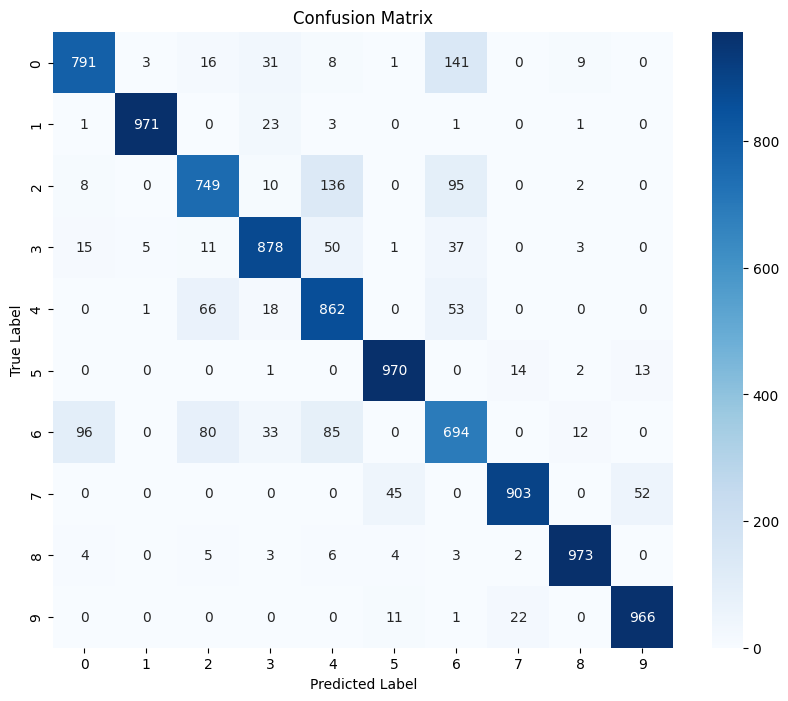

In [28]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute and log confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [29]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.75      0.78      1000
           3       0.88      0.88      0.88      1000
           4       0.75      0.86      0.80      1000
           5       0.94      0.97      0.95      1000
           6       0.68      0.69      0.69      1000
           7       0.96      0.90      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



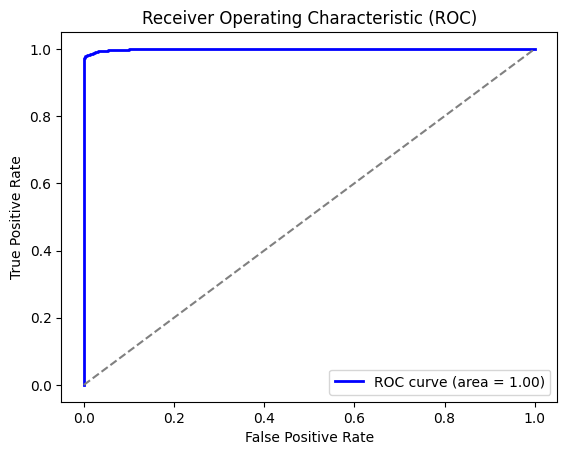

In [30]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

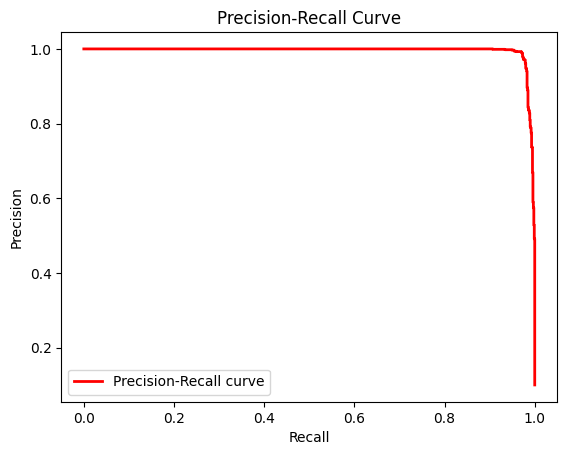

In [31]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

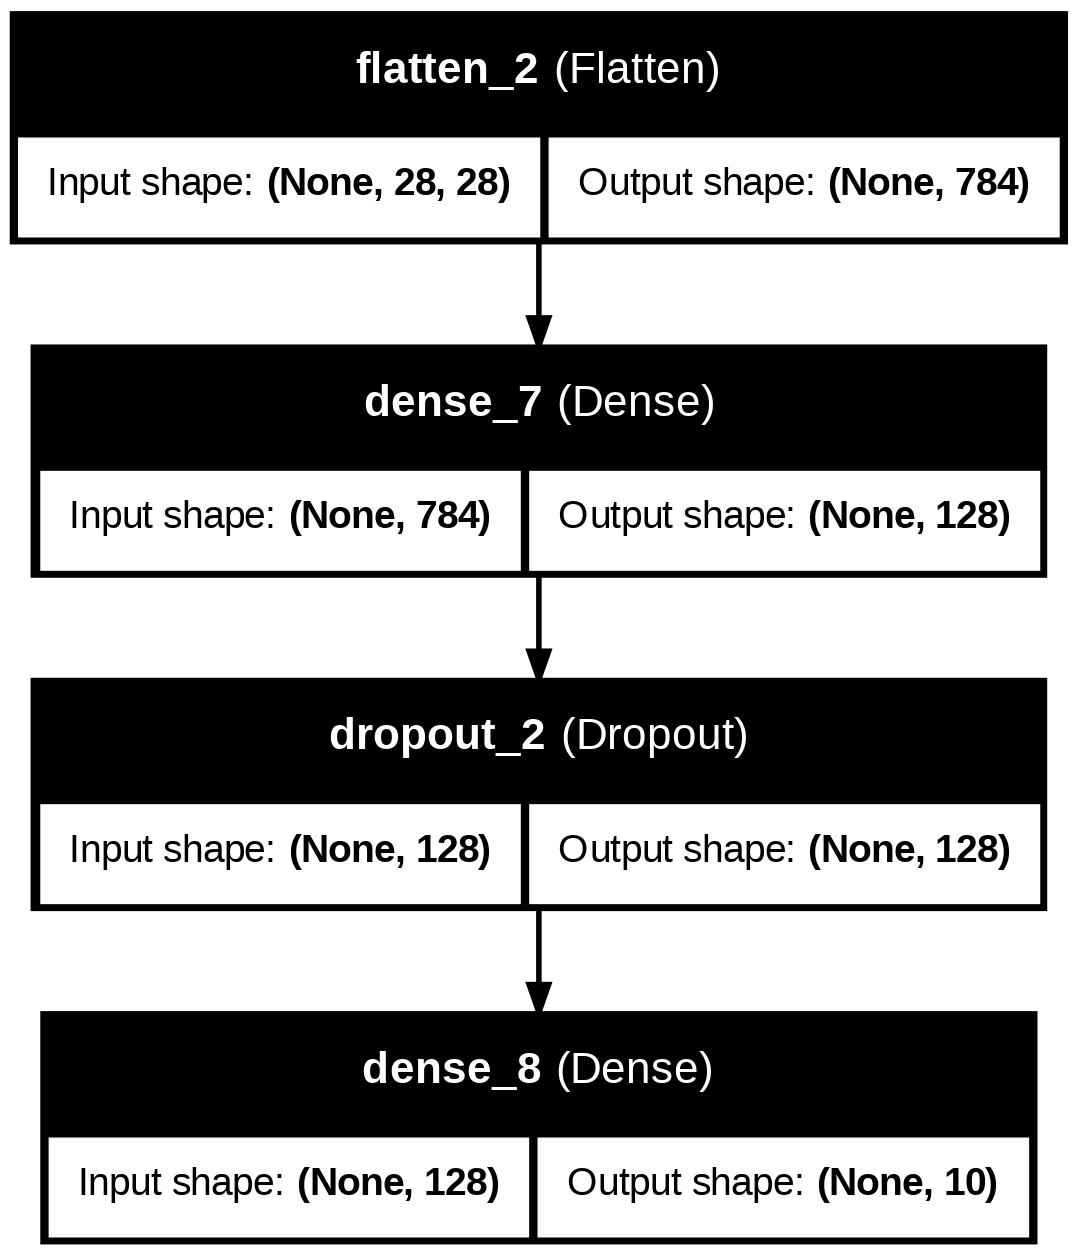

In [32]:
# Log model architecture
from tensorflow.keras.utils import plot_model

# Save and display model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [34]:
# Print model summary
print('Model Summary:')
model.summary()

Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)